In [1]:
# Group Part - Part 1, 2, 3
# Individual Part - Part 4

In [2]:
# import statements
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import loans
import json
import zipfile
from io import TextIOWrapper
import csv
import search
import time

In [3]:
%reload_ext autoreload

In [4]:
applicant = loans.Applicant("20-30", ["1", "2", "3"])
applicant.race

{'American Indian or Alaska Native', 'Asian', 'Black or African American'}

In [5]:
repr(applicant)

"Applicant('20-30', ['American Indian or Alaska Native', 'Asian', 'Black or African American'])"

In [6]:
applicant.lower_age()

20

In [7]:
sorted([
    loans.Applicant(">75", ["43", "44"]),
    loans.Applicant("20-30", ["1", "3"]),
    loans.Applicant("35-44", ["22"]),
    loans.Applicant("<25", ["5"]),
])

[Applicant('20-30', ['American Indian or Alaska Native', 'Black or African American']),
 Applicant('<25', ['White']),
 Applicant('35-44', ['Chinese']),
 Applicant('>75', ['Other Pacific Islander', 'Samoan'])]

In [8]:
values = {'activity_year': '2020', 'lei': '549300FX7K8PTEQUU487', 'derived_msa-md': '31540', 'state_code': 'WI',
         'county_code': '55025', 'census_tract': '55025002402', 'conforming_loan_limit': 'C',
         'derived_loan_product_type': 'Conventional:First Lien',
         'derived_dwelling_category': 'Single Family (1-4 Units):Site-Built',
         'derived_ethnicity': 'Not Hispanic or Latino', 'derived_race': 'White', 'derived_sex': 'Male',
         'action_taken': '3', 'purchaser_type': '0', 'preapproval': '2', 'loan_type': '1', 'loan_purpose': '4',
         'lien_status': '1', 'reverse_mortgage': '2', 'open-end_line_of_credit': '1',
         'business_or_commercial_purpose': '2', 'loan_amount': '225000.0', 'loan_to_value_ratio': '78.671',
         'interest_rate': '3.000', 'rate_spread': 'NA', 'hoepa_status': '3', 'total_loan_costs': 'NA',
         'total_points_and_fees': 'NA', 'origination_charges': 'NA', 'discount_points': 'NA',
         'lender_credits': 'NA', 'loan_term': '360', 'prepayment_penalty_term': 'NA', 'intro_rate_period': '1',
         'negative_amortization': '2', 'interest_only_payment': '2', 'balloon_payment': '2',
         'other_nonamortizing_features': '2', 'property_value': '285000', 'construction_method': '1',
         'occupancy_type': '1', 'manufactured_home_secured_property_type': '3',
         'manufactured_home_land_property_interest': '5', 'total_units': '1', 'multifamily_affordable_units': 'NA',
         'income': '0', 'debt_to_income_ratio': '>60%', 'applicant_credit_score_type': '1',
         'co-applicant_credit_score_type': '10', 'applicant_ethnicity-1': '2', 'applicant_ethnicity-2': '',
         'applicant_ethnicity-3': '', 'applicant_ethnicity-4': '', 'applicant_ethnicity-5': '',
         'co-applicant_ethnicity-1': '5', 'co-applicant_ethnicity-2': '', 'co-applicant_ethnicity-3': '',
         'co-applicant_ethnicity-4': '', 'co-applicant_ethnicity-5': '', 'applicant_ethnicity_observed': '2',
         'co-applicant_ethnicity_observed': '4', 'applicant_race-1': '5', 'applicant_race-2': '',
         'applicant_race-3': '', 'applicant_race-4': '', 'applicant_race-5': '', 'co-applicant_race-1': '8',
         'co-applicant_race-2': '', 'co-applicant_race-3': '', 'co-applicant_race-4': '', 'co-applicant_race-5': '',
         'applicant_race_observed': '2', 'co-applicant_race_observed': '4', 'applicant_sex': '1',
         'co-applicant_sex': '5', 'applicant_sex_observed': '2', 'co-applicant_sex_observed': '4',
         'applicant_age': '55-64', 'co-applicant_age': '9999', 'applicant_age_above_62': 'Yes',
         'co-applicant_age_above_62': 'NA', 'submission_of_application': '1', 'initially_payable_to_institution': '1',
         'aus-1': '6', 'aus-2': '', 'aus-3': '', 'aus-4': '', 'aus-5': '', 'denial_reason-1': '1',
         'denial_reason-2': '', 'denial_reason-3': '', 'denial_reason-4': '', 'tract_population': '3572',
         'tract_minority_population_percent': '41.1499999999999986', 'ffiec_msa_md_median_family_income': '96600',
         'tract_to_msa_income_percentage': '64', 'tract_owner_occupied_units': '812',
         'tract_one_to_four_family_homes': '910', 'tract_median_age_of_housing_units': '45'}

In [9]:
loan = loans.Loan(values)

In [10]:
loan.interest_rate

3.0

In [11]:
loan.applicants

[Applicant('55-64', ['White'])]

In [12]:
print(loan)

<Loan: 3.0% on $225000.0 with 1 applicant(s)>


In [13]:
for amt in loan.yearly_amounts(80000):
    print(amt)

225000.0
151750.0
76302.5


In [14]:
lcu = loans.Bank("Landmark Credit Union")

In [15]:
print(len(lcu))
print(lcu[-1])
print(lcu[0])

17632
<Loan: 2.875% on $305000.0 with 1 applicant(s)>
<Loan: 3.0% on $365000.0 with 2 applicant(s)>


In [16]:
with open('banks.json', 'r') as f:
    bank_data = json.load(f)

In [17]:
tree = search.BST()
tree.add("A", 9)
tree.add("A", 5)
tree.add("B", 22)
tree.add("C", 33)
tree.dump()

A : [9, 5]
B : [22]
C : [33]


In [18]:
t = search.BST()
t.add("B", 3)
assert len(t.root) == 1
t.add("A", 2)
assert len(t.root) == 2
t.add("C", 1)
assert len(t.root) == 3
t.add("C", 4)
assert len(t.root) == 4

In [19]:
t.root.lookup("A")

[2]

In [20]:
t.root.lookup("C")

[1, 4]

In [21]:
t.root.lookup("Z")

[]

In [22]:
tree = search.BST()

tree.add("A", 9)
tree.add("A", 5)
tree.add("B", 22)
tree.add("C", 33)

tree.dump()

print(tree["A"]) 
print(tree["B"])
print(tree["C"])
print(tree["Z"])

A : [9, 5]
B : [22]
C : [33]
[9, 5]
[22]
[33]
[]


In [23]:
mbi = loans.Bank("Merchants Bank of Indiana")

In [24]:
#Q1
def average_interest_rate(bank):
    total_interest = 0
    count = 0
    for loan in bank.loan_list:
        if loan.interest_rate != -1:
            total_interest += loan.interest_rate
            count += 1
    return total_interest / count

avg_rate = average_interest_rate(mbi)
avg_rate

3.2181818181818183

In [25]:
#Q2
def average_applicants_per_loan(bank):
    total_applicants = 0
    for loan in bank.loan_list:
        total_applicants += len(loan.applicants)
    return total_applicants / len(bank.loan_list)

avg_applicants = average_applicants_per_loan(mbi)
avg_applicants

1.6724137931034482

In [26]:
#Q3
from collections import defaultdict

def age_distribution(bank):
    age_dist = defaultdict(int)
    for loan in bank.loan_list:
        for applicant in loan.applicants:
            age_dist[applicant.age] += 1
    return dict(age_dist)

age_dist = age_distribution(mbi)
age_dist

{'65-74': 6, '<25': 2, '35-44': 43, '25-34': 28, '45-54': 16, '55-64': 2}

In [27]:
#Q4
def build_bst(bank):
    bst = search.BST()
    missing_interest_count = 0
    for loan in bank.loan_list:
        if loan.interest_rate == -1:
            missing_interest_count += 1
        else:
            bst.add(loan.interest_rate, loan)
    return bst, missing_interest_count

mbi_tree, missing_rate_count = build_bst(mbi)
missing_rate_count

3

In [28]:
#Q5
def tree_height(node):
    if node is None:
        return 0 
    else:
        left_height = tree_height(node.left)
        right_height = tree_height(node.right)
        return 1 + max(left_height, right_height)

height = tree_height(mbi_tree.root)
height

8

In [29]:
lcu_tree = search.BST()

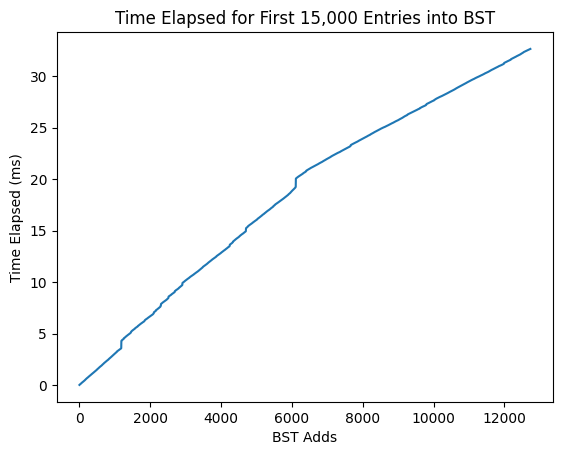

In [30]:
#Q6
def add_loans_with_timing(bank, bst, max_loans=15000):
    times = []
    start_time = time.time()
    
    for i, loan in enumerate(bank.loan_list):
        if loan.interest_rate == -1:
            continue
        bst.add(loan.interest_rate, loan)
        end_ime = time.time() - start_time
        times.append(end_ime * 1000)
    
    return times

times = add_loans_with_timing(lcu, lcu_tree, 15000)

plt.plot(range(1, len(times) + 1), times)
plt.xlabel('BST Adds')
plt.ylabel('Time Elapsed (ms)')
plt.title('Time Elapsed for First 15,000 Entries into BST')
plt.show()

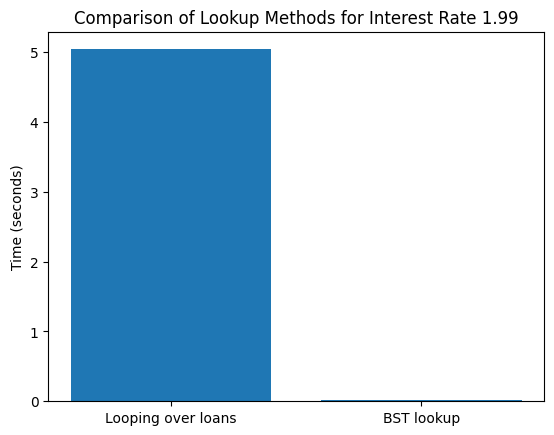

In [31]:
#Q7
def count_loans_by_rate_loop(bank, rate):
    start_time = time.time()
    count = sum(1 for loan in bank.loan_list if loan.interest_rate == rate)
    elapsed_time = time.time() - start_time
    return count, float(elapsed_time*1000)

def count_loans_by_rate_bst(bst, rate):
    start_time = time.time()
    loans = bst[rate]
    count = len(loans)
    elapsed_time = time.time() - start_time
    return count, float(elapsed_time*1000)

count_loop, time_loop = count_loans_by_rate_loop(lcu, 1.99)
count_bst, time_bst = count_loans_by_rate_bst(lcu_tree, 1.99)

plt.bar(['Looping over loans', 'BST lookup'], [time_loop, time_bst])
plt.ylabel('Time (seconds)')
plt.title('Comparison of Lookup Methods for Interest Rate 1.99')
plt.show()

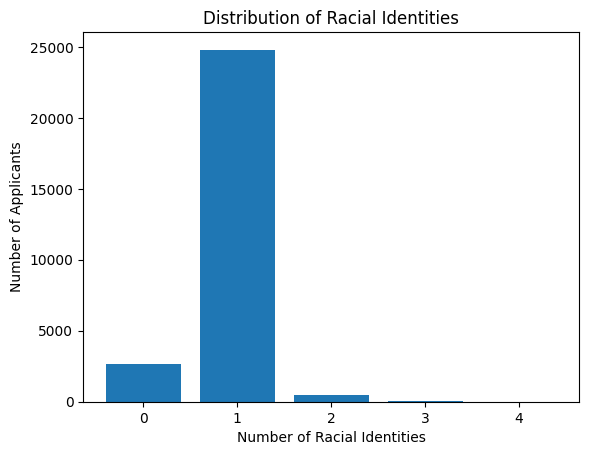

In [32]:
#Q8
def racial_identity_distribution(bank):
    race_count_dist = defaultdict(int)
    for loan in bank.loan_list:
        for applicant in loan.applicants:
            race_count_dist[len(applicant.race)] += 1
    return dict(race_count_dist)

race_dist = racial_identity_distribution(lcu)

plt.bar(race_dist.keys(), race_dist.values())
plt.xlabel('Number of Racial Identities')
plt.ylabel('Number of Applicants')
plt.title('Distribution of Racial Identities')
plt.show()

In [33]:
#Q9
def count_leaf_nodes(node):
    if node is None:
        return 0

    if node.left is None and node.right is None:
        return 1

    num_left = count_leaf_nodes(node.left)
    num_right = count_leaf_nodes(node.right)

    return num_left + num_right

leaf_count = count_leaf_nodes(lcu_tree.root)
leaf_count

63

In [34]:
#Q10
def find_top_n_keys(node, n, keys=[]):
    if node is None or len(keys) >= n:
        return keys

    find_top_n_keys(node.right, n, keys)

    if len(keys) < n:
        keys.append(node.key)

    find_top_n_keys(node.left, n, keys)
    
    return keys

top_3_rates = find_top_n_keys(lcu_tree.root, 3)
top_3_rates[-1]

9.85